# Week 2-1: Application of Request Library 学习笔记与知识点解析

<font color=blue size=5.5 face=雅黑>**知识点1：Python 数据爬虫的原理是什么？**</font>

我们将互联网比喻成一张网，Python程序类似蜘蛛，到每个节点中抓取核心信息。爬虫是指：给网站发送请求，获取资源后解析并提取有用数据的程序。
  
  

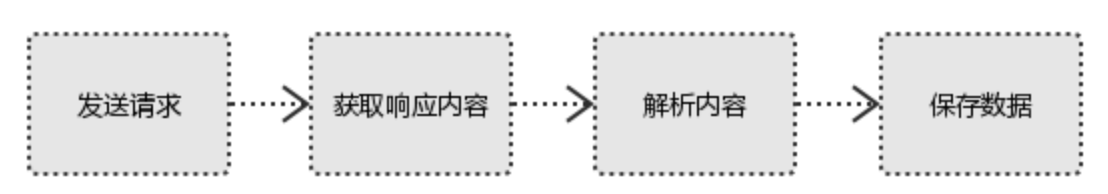

发送请求：request

- 使用http库向目标站点发起请求，即发送一个Request

- Request包含：请求头、请求体等 

- Request模块缺陷：不能执行JS 和CSS 代码




获取响应内容：response

- 如果服务器能正常响应，则会得到一个Response

- Response包含：html，json，图片，视频等




解析内容

- 解析html数据：正则表达式（RE模块），第三方解析库如Beautifulsoup，pyquery等

- 解析json（JavaScript Object Notation）数据：json模块

- 解析二进制数据:以wb的方式写入文件




保存数据

- 创建数据库（MySQL，Mongdb、Redis），保存文件



<font color=blue size=5 face=雅黑>**Python 数据爬虫的请求方式**</font>

In [7]:
import requests #载入请求库

res = requests.get('http://bj.xiaozhu.com/') #小猪租房北京地区

In [8]:
res.status_code #让我们看看网站的状态码

200

In [9]:
print(res.text) #使用text课以获得源代码；

<font color=blue size=4 face=雅黑>**小练习**</font>

请求网页源代码的原因是要核验网站的信息。比如网站在登录和未登录的情况下，网页源代码是不一样的。我们针对豆瓣网来做一个练习。

网址：www.douban.com

1. 我们将以上网站直接写入代码：douban = requests.get('www.douban.com') 会得到什么样的结果？

2. 在未登录豆瓣的情况下请求网站，获取网页源代码，并将其命名为t1

3. 在已登录豆瓣的情况下请求网站，获取网页源代码，并将其命名为t2

4. 对比t1和t2，看看有什么不同。

<font color=blue size=5.5 face=雅黑> **知识点2：请求数据的方式用Get还是POST**</font>

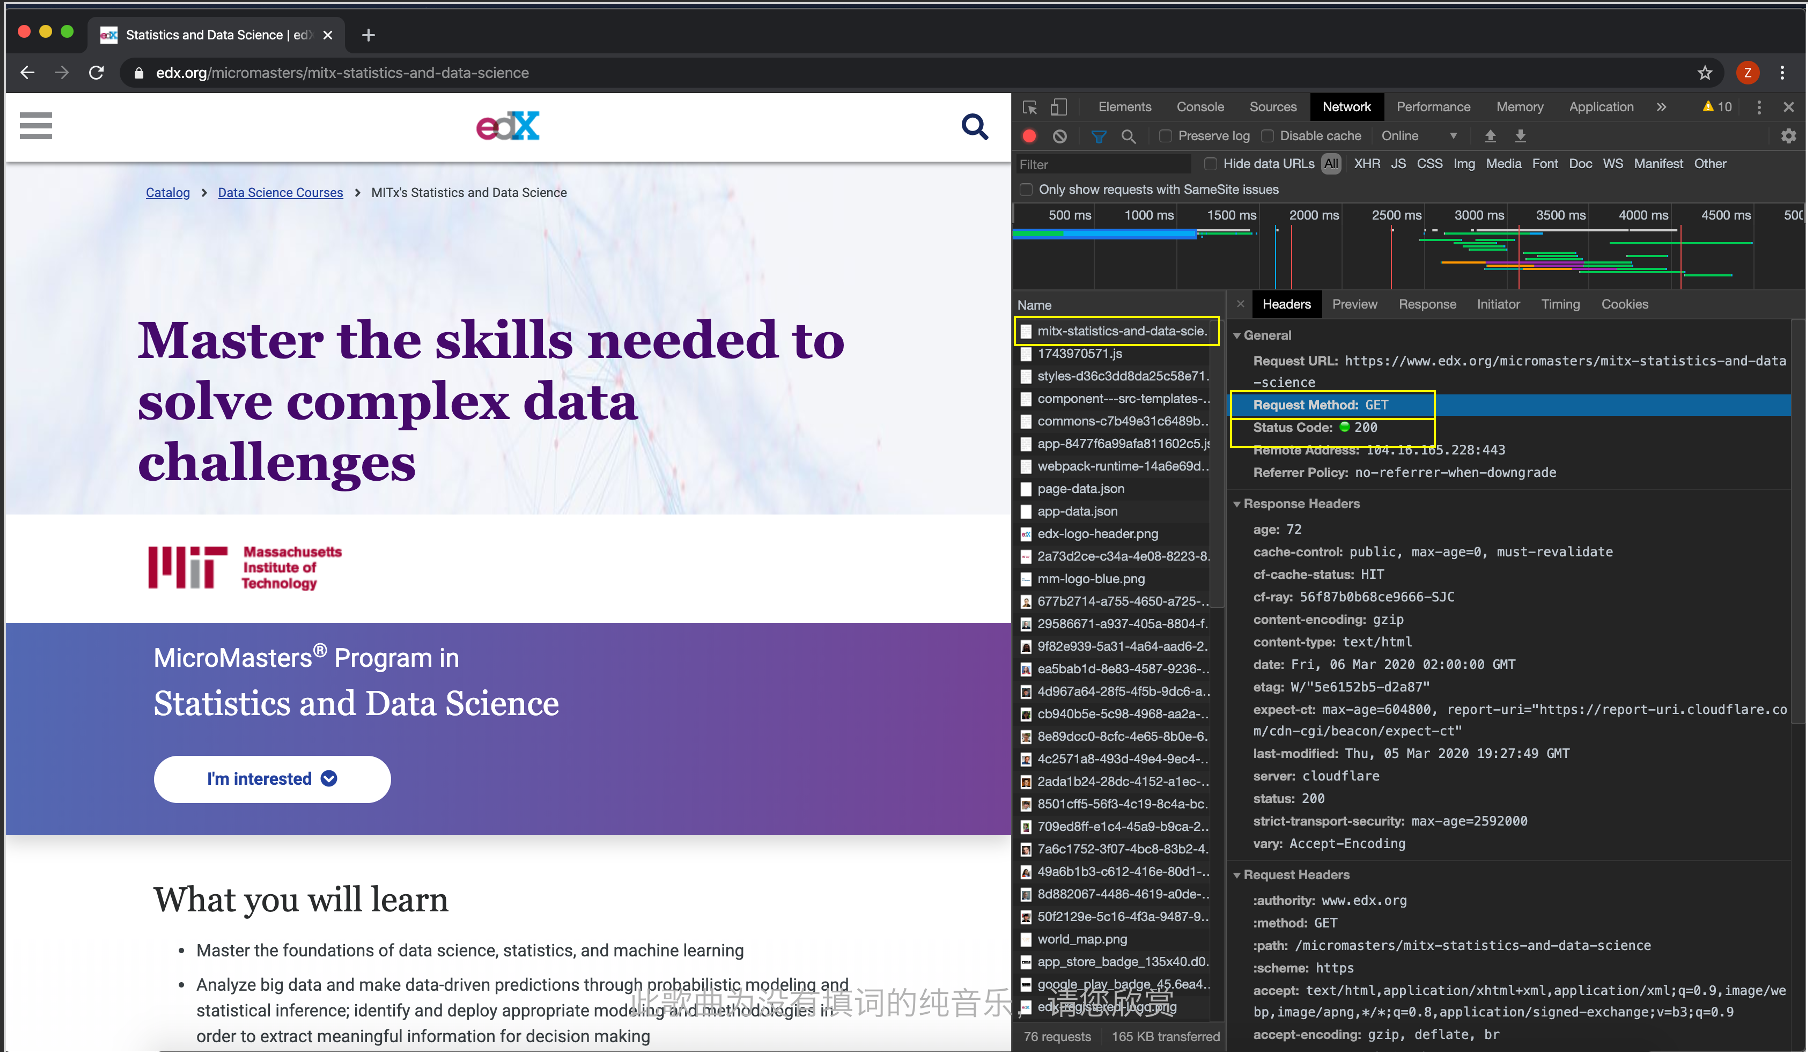


打开网页源代码，选择network，找到与网址（URL）对应的信息，如黄色框标示的位置。这里我打开的网页是EDX - MITx数据科学课程的页面。然后我们再右侧信息栏找到了网页请求方式（如黄色框内容）：GET，并且我们还看到网站状态码是200，代表我们可以正常的连接服务器。

In [10]:
import requests

mitx = requests.get("https://www.edx.org/micromasters/mitx-statistics-and-data-science")

In [11]:
mitx.status_code

200

In [12]:
print(type(mitx))

<class 'requests.models.Response'>


<font color=blue size=5.5 face=雅黑> **选学知识：API**</font>

Response是响应的意思。之前我们说到数据爬虫的流程中，第一步是发起请求，那么第二步就是获取响应，看看当前的响应状态。每一个网站都有自己的响应状态。这里我们不做过多的学习。你只需要指导网站请求的结果是响应模型就可以了。

可能有些人还是会感觉很糊涂，这里我再深入给大家讲讲请求和响应的原理：API。

Request.get 用于检索特定的数据信息。每一个网站都有一个特定的API端口，可以帮助我们获取特定的数据。

那么我们该怎么去理解API呢？打个比方：你正在爱奇艺上看一部电影，当剧情高潮迭起，精彩异常，你想要倒回去再看一遍 那应该怎么办呢？

我们可以把电影看完了，然后再重播，等到那个精彩的时刻。亦或者使用你用鼠标（或者遥控器）将时间拨回10分钟前，你就可以再一次回顾刚才那一段精彩的片段。API就是你的鼠标（遥控器）。

网站的数据通常是流动性的，数据会从无数个端口（end point）进入，例如股票信息、淘宝商品页面等等。API类似一个定位工具，帮助我们找到关键数据。就如同我们之前将的例子，如果说我们要等到电影结束，然后再回到之前的片段，等同于我们要过滤掉所有的数据，然后重新开始，这么做其实是没有意义的。

所以，API就像鼠标（遥控器）一样帮助我们定位特征，找到数据所在的位置。可能有的人还是不太理解什么是特征？就如同你要倒回去看哪一段精彩片段一样，你是如何定位数据的呢？例如反派出现的那一刹那，主角危急关头站了起来，或者音乐。电影精彩片段开始之前，总有一个特定的节点在等着你。所以这就是刚才所说的定位特征。

回到现实，我们打开了淘宝，想要搜索男士皮鞋，那么我们就可以从商品栏中找到我们需要的东西，而不是把淘宝上所有的数据都翻一遍，直到我们找到所需的商品。

In [15]:
#现在让我们来复习一下之前学习到的请求与网站回应的知识

#http://api.open-notify.org是一个链接美国NASA卫星的开源平台，我们可以使用这个网站来查看当前国际空间站的位置

#我们现在在网站后面加上“iss-now”意思是 international - space - statation 国际空间站当前的位置

#我们使用轻量级语言 Java Script与 API链接。今后你将学习JSON的知识，现在你只需要指导你与API产生了链接。

#浏览器上打开这个网站，看看你能得到什么

import requests

response = requests.get("http://api.open-notify.org/iss-now.json")

In [16]:
#使用response.status_code来查看网页的状态

status_code = response.status_code

status_code

200

状态码为200，代表网站一切顺利。我们还需要了解一下常用的状态码，用以帮助我们找到网页打不开的问题

200-一切正常，服务器返回结果（如果有）。

301-服务器将您重定向到其他端点。 当公司切换域名或更改端点名称时，可能会发生这种情况。

401-服务器认为您未通过身份验证。 当您没有发送正确的凭据来访问API时就会发生这种情况（我们将在以后的任务中讨论）。

400-服务器认为您提出了错误的请求。 当您不发送API处理您的请求所需的信息时，可能会发生这种情况。

403-您尝试访问的资源被禁止； 您无权查看它。

404-服务器找不到您尝试访问的资源。

In [17]:
web = requests.get("http://api.open-notify.org/iss-pas")

status_code = web.status_code

print(status_code) #我们可以看到状态码是404，原因可能是我们网站地址错误

404


In [18]:
web = requests.get("http://api.open-notify.org/iss-pass.json") #我们可能忘记输入json了，尝试一下这一次的结果会正确吗？

status_code = web.status_code 
 
print(status_code) #我们看到了结果是400，说明我们的请求有错误。

400


用你的浏览器打开这个网站：http://api.open-notify.org/iss-pass.json，你会看到结果是：

"message": "failure", 

"reason": "Latitude must be specified" ->我们缺乏维度，没有办法获取数据信息

阅读国际空间站的网站（http://open-notify.org/Open-Notify-API/ISS-Pass-Times/） 可以得知，我们的请求缺乏两个重要的变量：经度和维度，否则NASA很难帮我们准确定位。所以我们现在来学习一下，如何通过api来设定经纬度来获取我们的结果。

In [20]:
#其实方法也很简单，那就是在网址（URL）后面加上经纬度就可以了，如下

url = "http://api.open-notify.org/iss-pass.json?lat=45.87&lon=-79" #用浏览器打开看看我们的回应结果是什么？

#----------------------------------------------------------

#来一点 NASA小科普：datetime ，risetime都是使用特定的时间编码time_stamp（时空邮票），用于描述特定的时间、地点和事件

#这一串数字就如同密码一般述说着宇宙的秘密，永无尽头的数字，描述着无限的宇宙和空间，也许我们在一起的时间是短暂的，但是time_stamp

#已经记录下了只属于这一刻的密码，永远无法抹掉，你始终留存这一刻的空间里，我将在梦中穿越时空，用这一张邮票找到你(是不是很浪漫 ~)

In [21]:
#书回正题，我们知道每一个网站的后缀都是不一样的，但是却存在这一个规律，举个例子：

#www.example.com/page1

#www.example.com/page2

#你可以看到斜杠的后缀是page 1,page 2也就是代表了第一页，第二页。倘若有100页，我们可以建立一个列表来存储数据

#这样Python就可以自动跳转拖个页面，我们来看一看是怎么做的：

parameters = {"lat": 40.71, "lon": -74}  #首先我们把网页后缀的变量放入一个数据集，这里使用字典而不是列表，是因为我们要指明经纬度

response = requests.get("http://api.open-notify.org/iss-pass.json", params=parameters)#现在使用get，添加params为后缀

print(response.content) #我们可以使用content来获得数据信息

b'{\n  "message": "success", \n  "request": {\n    "altitude": 100, \n    "datetime": 1583461483, \n    "latitude": 40.71, \n    "longitude": -74.0, \n    "passes": 5\n  }, \n  "response": [\n    {\n      "duration": 591, \n      "risetime": 1583470086\n    }, \n    {\n      "duration": 648, \n      "risetime": 1583475851\n    }, \n    {\n      "duration": 581, \n      "risetime": 1583481729\n    }, \n    {\n      "duration": 571, \n      "risetime": 1583487605\n    }, \n    {\n      "duration": 640, \n      "risetime": 1583493424\n    }\n  ]\n}\n'


In [22]:
#我们来验证一下上面的答案是不是正确的

response = requests.get("http://api.open-notify.org/iss-pass.json?lat=40.71&lon=-74") 

print(response.content)

b'{\n  "message": "success", \n  "request": {\n    "altitude": 100, \n    "datetime": 1583461483, \n    "latitude": 40.71, \n    "longitude": -74.0, \n    "passes": 5\n  }, \n  "response": [\n    {\n      "duration": 591, \n      "risetime": 1583470086\n    }, \n    {\n      "duration": 648, \n      "risetime": 1583475851\n    }, \n    {\n      "duration": 581, \n      "risetime": 1583481729\n    }, \n    {\n      "duration": 571, \n      "risetime": 1583487605\n    }, \n    {\n      "duration": 640, \n      "risetime": 1583493424\n    }\n  ]\n}\n'


<font color=blue size=5.5 face=雅黑> **知识点3：数据获取与请求的“乱码”处理方法**</font>

In [25]:
#现在我们请求连接百度服务器

import requests

web = requests.get("http://www.baidu.com")

print(web.text)

<!DOCTYPE html>
<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=http://s1.bdstatic.com/r/www/cache/bdorz/baidu.min.css><title>ç¾åº¦ä¸ä¸ï¼ä½ å°±ç¥é</title></head> <body link=#0000cc> <div id=wrapper> <div id=head> <div class=head_wrapper> <div class=s_form> <div class=s_form_wrapper> <div id=lg> <img hidefocus=true src=//www.baidu.com/img/bd_logo1.png width=270 height=129> </div> <form id=form name=f action=//www.baidu.com/s class=fm> <input type=hidden name=bdorz_come value=1> <input type=hidden name=ie value=utf-8> <input type=hidden name=f value=8> <input type=hidden name=rsv_bp value=1> <input type=hidden name=rsv_idx value=1> <input type=hidden name=tn value=baidu><span class="bg s_ipt_wr"><input id=kw name=wd class=s_ipt value maxlength=255 autocomplete=off autofocus></span><span class="bg s_btn_wr"><input typ

我们会看到网站的请求结果出现了很多看不懂的文字，例如<title>ç¾åº¦ä¸ä¸ï¼ä½ å°±ç¥é</title></head>中的那一段看不懂的语言究竟是什么？当我们看到这个问题的时候，第一反应肯定是转码，既然这是一段看不懂的文字，那我们就看看它的代码类型是什么，要转换成什么。

In [28]:
web.encoding 

#我们可以看到网站的编码是“ISO-8859-1”。科普一下：ISO-8859-1收录的字符除ASCII收录的字符外，

#还包括西欧语言、希腊语、泰语、阿拉伯语、希伯来语对应的文字符号，后来增加了东欧语言。

#我们在学习pandas语言转换的时候有一个 Latin1就是ISO-8895-1的简称，这也是一种加密手段

#举个例子：class=mnav>è´´å§</a> <noscript> 这是其中的一行，我们通过转码来看看中间的语言 è´´å§是什么意思？

'ISO-8859-1'

In [29]:
web.encoding='utf-8'

In [30]:
web.text #转码之后再观察刚才那一段看不懂的外文代表什么意思： class=mnav>贴吧</a> <noscript> ，就是贴吧的意思，有趣吗？

'<!DOCTYPE html>\r\n<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=http://s1.bdstatic.com/r/www/cache/bdorz/baidu.min.css><title>百度一下，你就知道</title></head> <body link=#0000cc> <div id=wrapper> <div id=head> <div class=head_wrapper> <div class=s_form> <div class=s_form_wrapper> <div id=lg> <img hidefocus=true src=//www.baidu.com/img/bd_logo1.png width=270 height=129> </div> <form id=form name=f action=//www.baidu.com/s class=fm> <input type=hidden name=bdorz_come value=1> <input type=hidden name=ie value=utf-8> <input type=hidden name=f value=8> <input type=hidden name=rsv_bp value=1> <input type=hidden name=rsv_idx value=1> <input type=hidden name=tn value=baidu><span class="bg s_ipt_wr"><input id=kw name=wd class=s_ipt value maxlength=255 autocomplete=off autofocus></span><span class="bg s_btn_wr"><input type=submit id=su

<font color=blue size=5.5 face=雅黑> **思考题：这里我们使用的是encoding,它和decoding有什么区别？**</font>

字符串在Python内部的表示是unicode编码，因此，在做编码转换时，通常需要以unicode作为中间编码，即先将其他编码的字符串解码（decode）成unicode，再从unicode编码（encode）成另一种编码。decode的作用是将其他编码的字符串转换成unicode编码，如str1.decode('gb2312')，表示将gb2312编码的字符串str1转换成unicode编码。encode的作用是将unicode编码转换成其他编码的字符串，如str2.encode('gb2312')，表示将unicode编码的字符串str2转换成gb2312编码。

In [31]:
print(web.cookies)

#结果是cookie jar，翻译过来就是装饼干的罐子，

#用于存储用户的cookie(用于识别用户身份的小型文件)。每一块“饼干”就是一个用户的个人信息

#这个罐子就是内存，以前是大型数据库机房，现在可以理解为云端数据库

# RequestsCookieJar可以自动保存我们设置的用户名和密码，Python每次可以用我们设置好的信息来模拟登录

<RequestsCookieJar[<Cookie BDORZ=27315 for .baidu.com/>]>


<font color=blue size=5.5 face=雅黑> **选学知识：使用POST修改网页内容和密码模拟登录初体验（非必学内容）**</font>

<font color=blue size=4 face=雅黑>**POST修改网页内容**</font>

In [45]:
web_url = "http://httpbin.org/post" #网站地址之后加入post

#如果你想要改变的是网页的内容，可以将header换成params或者data,

#可以和上面的程序互换，看看数据在什么地方，有什么变化

#写上要改变的信息
header_values = {"User-Agent":"carlton app","date":"2021-some-day"} 

#改变数据信息
web_results = requests.post(web_url, data = header_values) 

print(web_results.text)#form格式的数据为查询数据，无法提取

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "User-Agent": "carlton app", 
    "date": "2021-some-day"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "41", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.22.0", 
    "X-Amzn-Trace-Id": "Root=1-5e61b98a-b746bf22cbda1e50944ea75c"
  }, 
  "json": null, 
  "origin": "167.99.98.18", 
  "url": "http://httpbin.org/post"
}



In [44]:
web_results_2 = requests.post(web_url, params = header_values)


print(web_results_2.text)  #args数据为调取数据，可以提取

{
  "args": {
    "User-Agent": "carlton app", 
    "date": "2021-some-day"
  }, 
  "data": "", 
  "files": {}, 
  "form": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "0", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.22.0", 
    "X-Amzn-Trace-Id": "Root=1-5e61b985-8e0b22bade1582a620b00b90"
  }, 
  "json": null, 
  "origin": "167.99.98.18", 
  "url": "http://httpbin.org/post?User-Agent=carlton+app&date=2021-some-day"
}



<font color=blue size=4 face=雅黑>**密码模拟登录**</font>

这是一个很好的机会来了解网站密码登录的运作模式，今后我们也会使用模拟登录的方式来获取数据采集权限

有些网站需要我们数据用户名和密码来获取采集授权。http://httpbin.org/ 是一个虚拟平台，供大家学习使用。我们来尝试在这上面建立一个虚拟平台，然后通过我们自己创建的用户名和密码认证来进入网站。

首先打开网站，在下方找到auth,点击try it again，然后如下图所示建立一个用户名和密码。这里大家可以随意创建，但是不要太复杂。最后点击Execute

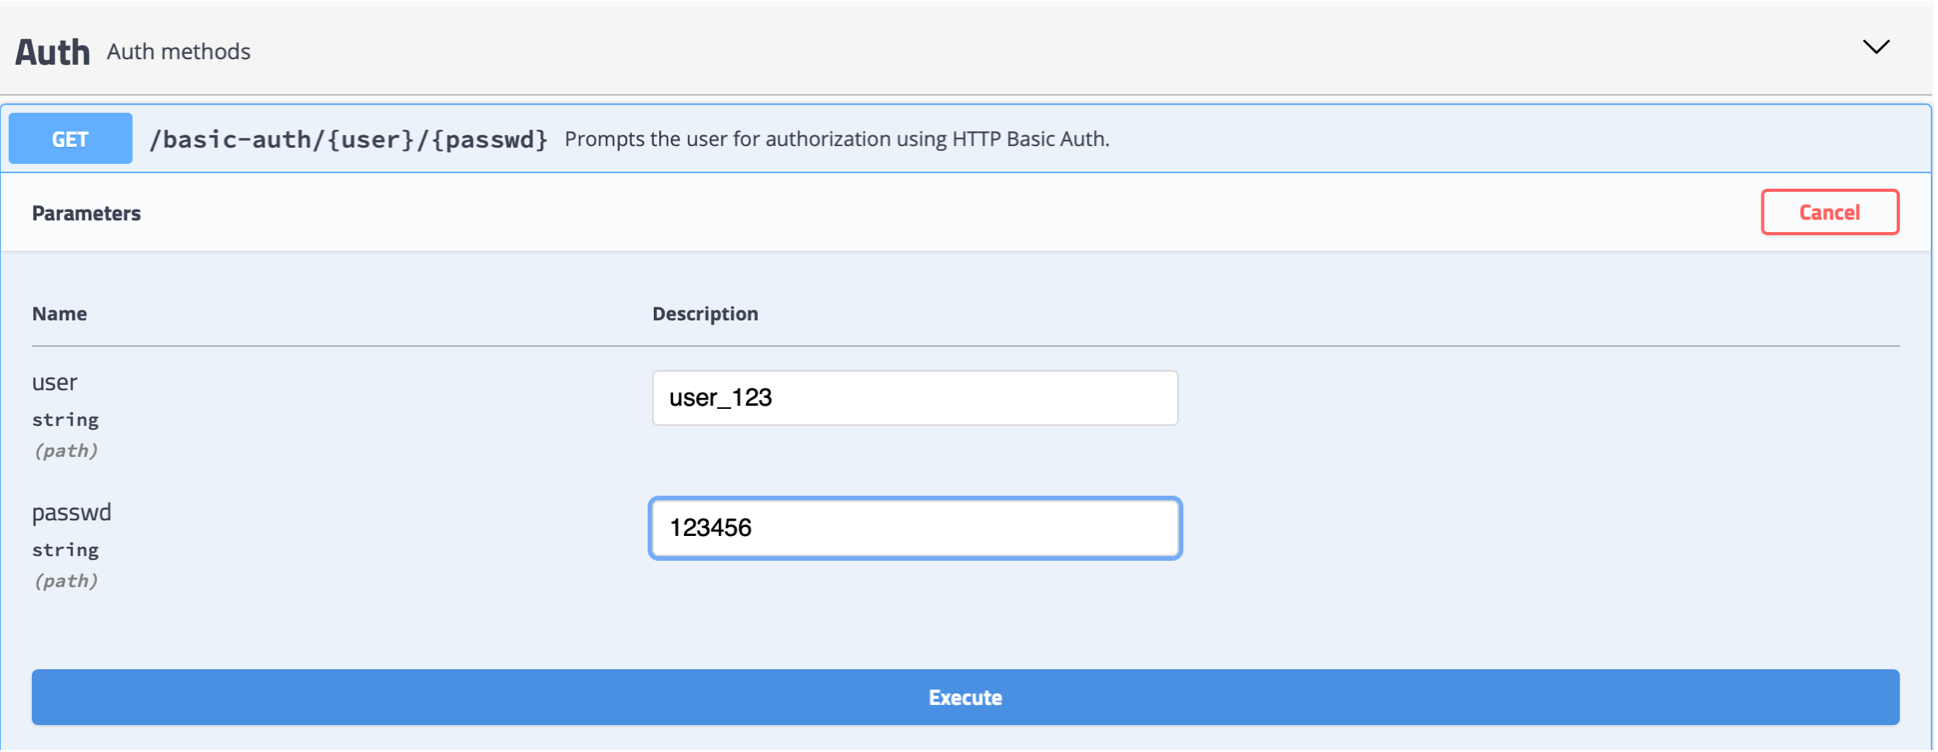

之后输入用户名和密码验证

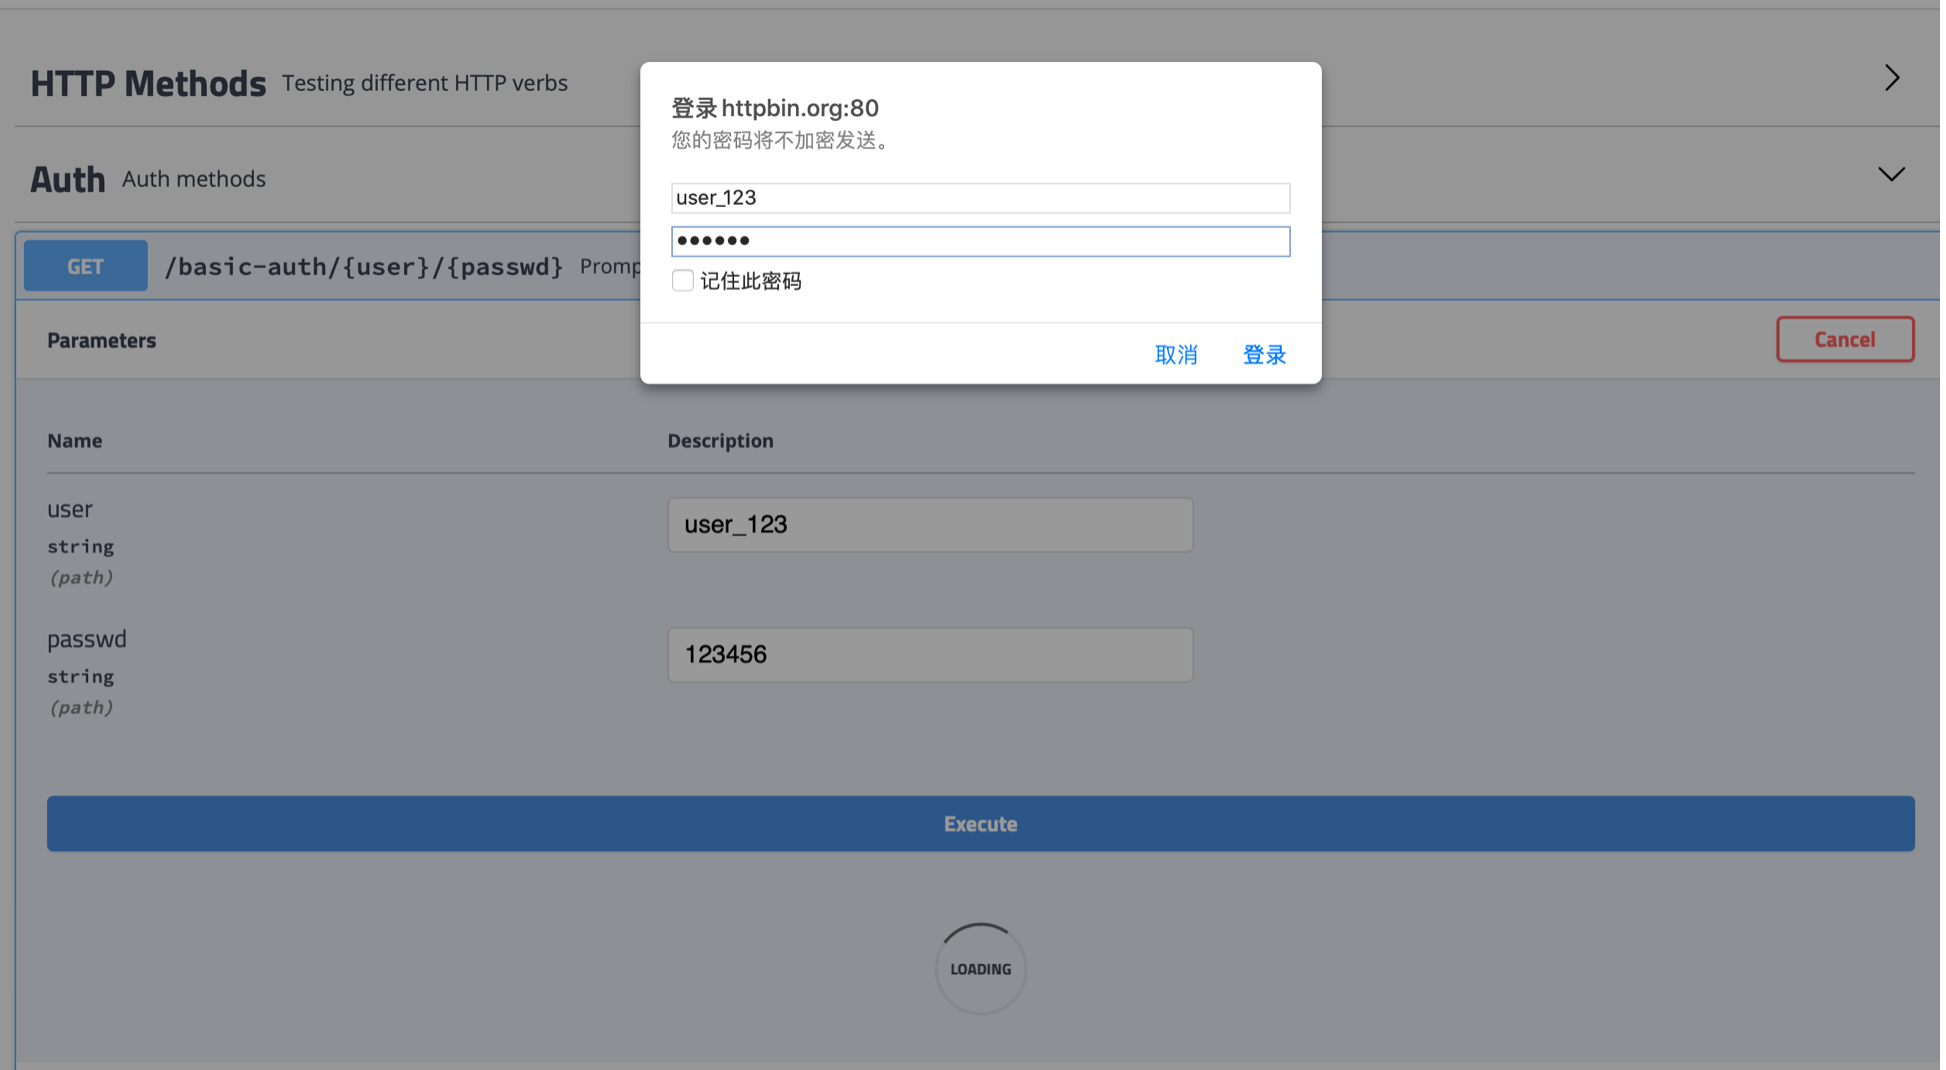


注意观察request url这个就是我们建立的虚拟网站，需要用刚才设定的用户名和密码打开
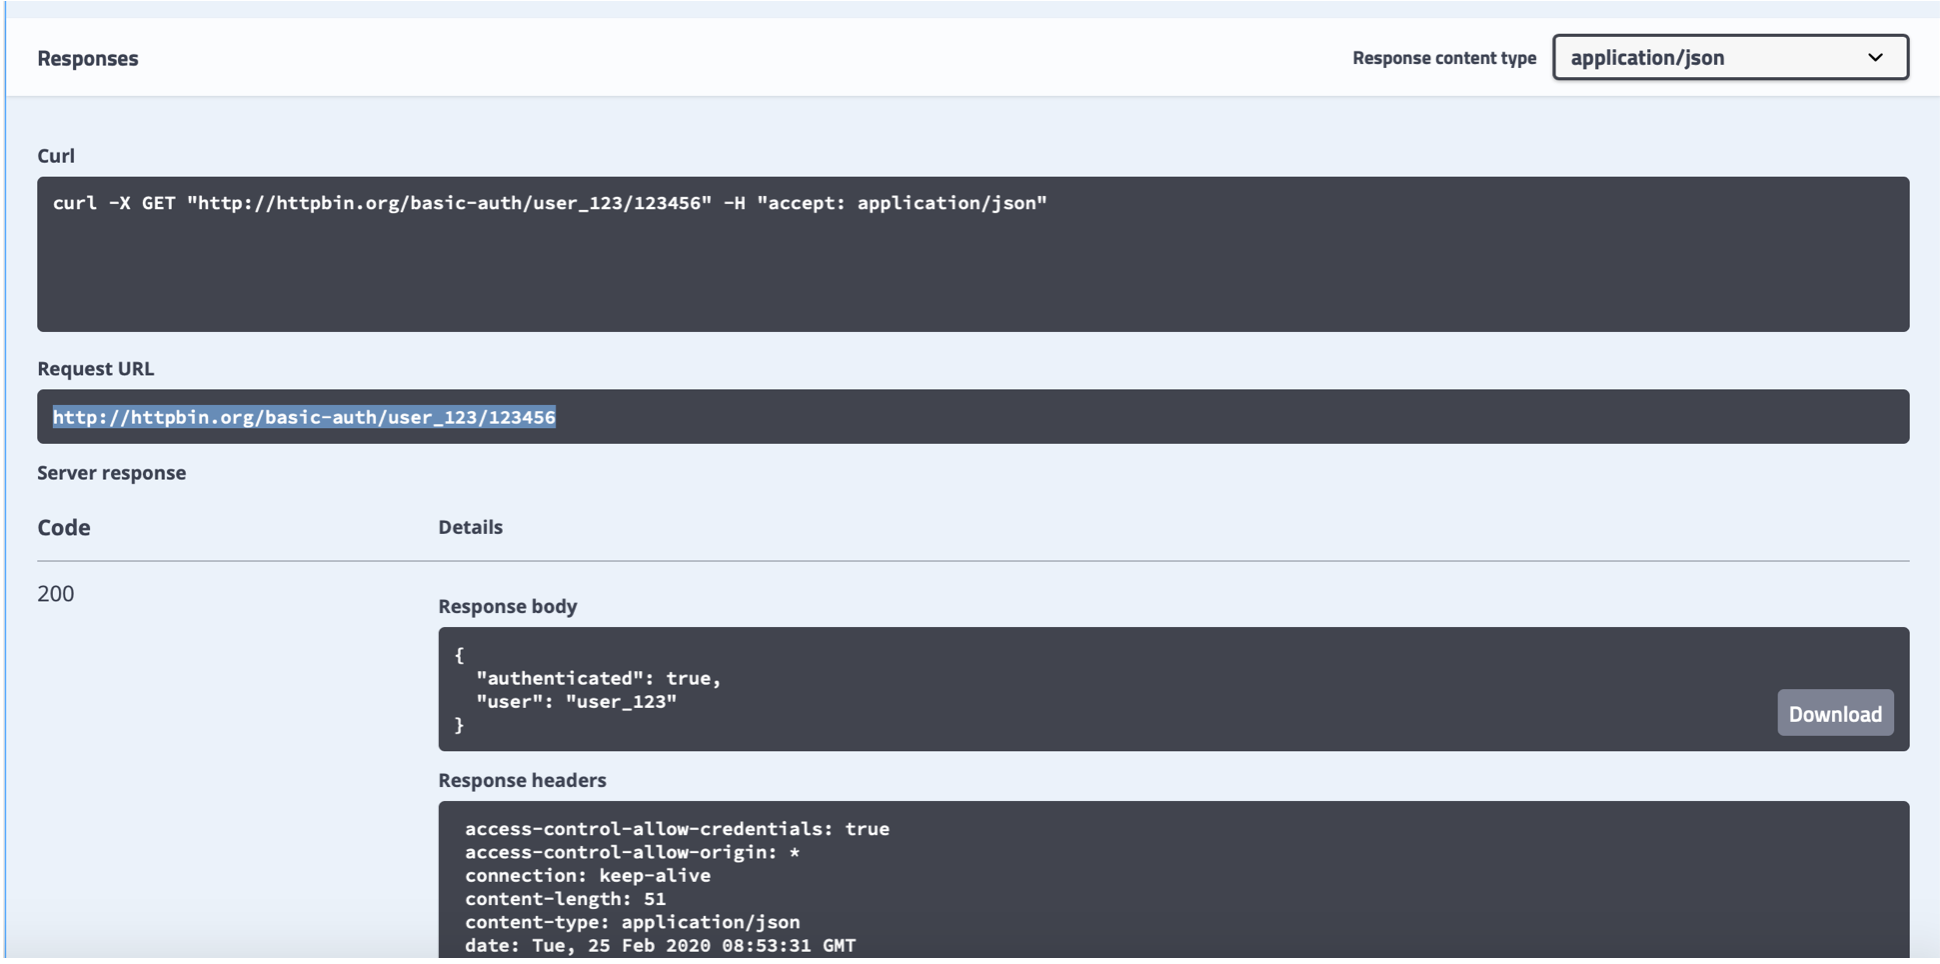

In [46]:
#现在我们来模拟登录

import requests

from requests.auth import HTTPBasicAuth

url = "http://httpbin.org/basic-auth/user_123/123456"

mycreates = HTTPBasicAuth("user_123","123456")

result = requests.get(url,auth = mycreates)

print(result.text) #authentication就是验证的意思，我们的网站现在还是一个空的，所以只有用户名和密码

print(result) #状态码是200，一切正常！

{
  "authenticated": true, 
  "user": "user_123"
}

<Response [200]>


<font color=blue size=5.5 face=雅黑> **知识点4：获取网页图片**</font>

In [47]:
#以Github站点图标为例：
r=requests.get('https://github.com/favicon.ico')
#print(r.status_code)
#print(r.text)#出现乱码，因为图片是二进制

print(type(r.status_code))

print(type(r.text))

#给大家科普一下，所有网页后面加上favicon.ico都是出现网站的图标，试试taobao.com会出现什么？

<class 'int'>
<class 'str'>


In [48]:
#以Github站点图标为例：
r=requests.get('https://github.com/favicon.ico')
print(r.status_code)
print(r.content)#出现乱码，因为图片是二进制,使用content方法以二进制形式展示

200
b'\x00\x00\x01\x00\x02\x00\x10\x10\x00\x00\x01\x00 \x00(\x05\x00\x00&\x00\x00\x00  \x00\x00\x01\x00 \x00(\x14\x00\x00N\x05\x00\x00(\x00\x00\x00\x10\x00\x00\x00 \x00\x00\x00\x01\x00 \x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11\x11\x13v\x13\x13\x13\xc5\x0e\x0e\x0e\x12\x00\x00\x00\x00\x00\x00\x00\x00\x0f\x0f\x0f\x11\x11\x11\x14\xb1\x13\x13\x13i\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x14\x14\x14\x96\x13\x13\x14\xfc\x13\x13\x14\xed\x00\x00\x00\x19\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x15\x15\x17\xff\x15\x15\x17\xff\x11\x11\x13\x85\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11\x11\x12\xc1\x13\x13\x14\xee\x11\x11\x11\x1e\x10\x10\x10\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\r\x13\x13\x14\xf5\x15\x15\x17\xff\x15\x15\x17\xff\x1

In [49]:
# 获取Github数字猫的图片内容
import requests

r=requests.get('https://github.com/favicon.ico')

with open('favicon.ico','wb') as f:   
    f.write(r.content)#使用OPEN的方法，以二进制写的形式打开，可以向文件里写二进制数据。
    f.close()
    
    #跟大家说一下这里的favicon.ico中的ico是一种图像类型叫做windows图标图像。
    #如果是favicon.png就是png格式的图像。

In [50]:
# 抓取图像链接：http://t.cn/EfgN7gz

import requests

headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.75 Safari/537.36'}

img = requests.get("http://t.cn/EfgN7gz", headers = headers)

with open("book.png",'wb') as f:
    f.write(img.content)
    f.close()

In [51]:
# 练习抓取百度贴吧 “python爬虫吧“ 里的帖子数据，#https://tieba.baidu.com/f?ie=utf-8&kw=python爬虫&fr=search

import requests

url = "https://tieba.baidu.com/f"  #问号是一个连接符

headers = {'User-Agent':"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36"}

data = {"ie":"utf-8",
       "kw":"python爬虫",
        "fr":"search"
       }

tieba = requests.get(url, params = data, headers = headers)

tieba.encoding = 'utf-8'

print(tieba.status_code)

print(type(tieba.text))

print(type(tieba.content))

200
<class 'str'>
<class 'bytes'>


In [52]:
tieba.text

'<!DOCTYPE html>\r\n<!--STATUS OK-->\r\n<html>\r\n<head>\r\n    <meta charset="UTF-8">\r\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\r\n    <link rel="search" type="application/opensearchdescription+xml" href="/tb/cms/content-search.xml" title="百度贴吧" />\r\n            <meta name="keywords" content="python爬虫,其他,舍我其谁,超越自我,有志者">\r\n    <meta name="description" content="本吧热帖: 1-微专业3个月成为网络爬虫工程师 2-Python小白到实战全套资料，Python大佬的独门秘籍 3-零基础如何快速学好Python！Python学习资料分享，互帮互助！ 4-最新最全Python资料分享，需要的留下邮箱，分享给你 5-论零基础入门小白如何学好Python爬虫！ 6-这些是 Python 官方推荐的最好书籍（推荐）">\r\n    <title>python爬虫吧-百度贴吧--Python路上，你我同行--当今之世,舍我其谁 超越自我,做向上的自己! 不求最好,只求更好 不为彼岸.只为大海 奋斗今天,笑看明天 有志者,事竟成 尽志无悔,花开不败 </title>\r\n    \r\n\r\n    \r\n<script>\r\n    void function(a,b,c,d,e,f,g){a.alogObjectName=e,a[e]=a[e]||function(){(a[e].q=a[e].q||[]).push(arguments)},a[e].l=a[e].l||+new Date,d="https:"===a.location.protocol?"https://fex.bdstatic.com"+d:"http://fex.bdstatic.com"+d;var h=!0;if(a.alogObjectConfig&&a.alogObjectC